# Get data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns # for data (diamonds)
import pandas as pd

In [2]:
data = sns.load_dataset('diamonds', cache=True, data_home=None)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Double axis

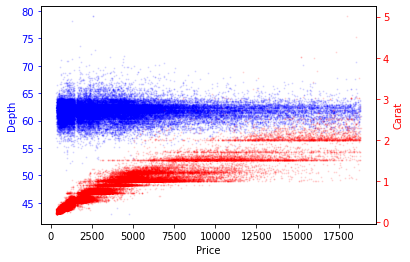

In [3]:
import matplotlib.pyplot as plt

# Initalize a Figure and Axes
fig, ax = plt.subplots()

# Plot the depth variable in blue
ax.scatter(data['price'], data['depth'], color='blue', 
           alpha = 0.1, s = 1)
ax.set_ylabel('Depth', color = 'b')
ax.tick_params('y', colors = 'b')

ax.set_xlabel('Price')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the carat in red
ax2.scatter(data['price'], data['carat'], color = 'red', 
           alpha = 0.1, s = 1)
ax2.set_ylabel('Carat', color='r')
ax2.tick_params('y', colors = 'r')


plt.show()

## Rewrite with function


In [4]:
def plot_doubleaxes(axes, x, y, color, alpha, s, xlabel, ylabel):
    axes.scatter(x, y, color=color,
               alpha = alpha, s = s)
    axes.set_ylabel(ylabel, color = color)
    axes.set_xlabel(xlabel)
    axes.tick_params('y', colors = color)


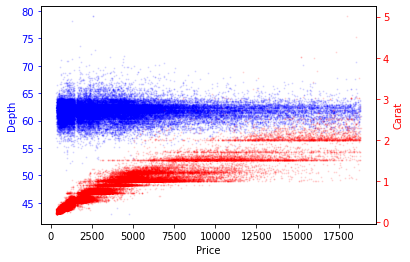

In [5]:
# create plot object
fig, ax = plt.subplots()

# Plot the depth in blue
plot_doubleaxes(ax, data['price'], data['depth'], 'blue', 0.1, 1, 'Price', 'Depth')

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the carat in red
plot_doubleaxes(ax2, data['price'], data['carat'], 'red', 0.1, 1, 'Price', 'Carat')

plt.show()

# Bar charts

In [6]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
# wrangle data, so that color counts (length) is in each column
data_bars = data[['cut', 'color']]
data_bars = data_bars.pivot_table(index='color', columns='cut', 
                        aggfunc=len, fill_value=0)

data_bars.head()

cut,Ideal,Premium,Very Good,Good,Fair
color,,,,,
D,2834,1603,1513,662,163
E,3903,2337,2400,933,224
F,3826,2331,2164,909,312
G,4884,2924,2299,871,314
H,3115,2360,1824,702,303


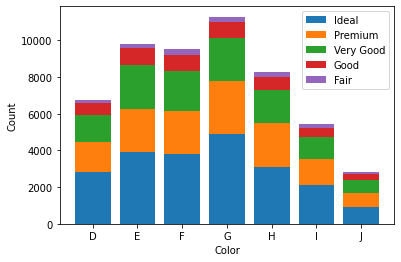

In [8]:
fig, ax = plt.subplots()
ax.bar(data_bars.index, data_bars['Ideal'], label = 'Ideal')
ax.bar(data_bars.index, data_bars['Premium'], label = 'Premium', 
      bottom = data_bars['Ideal'])
ax.bar(data_bars.index, data_bars['Very Good'], label = 'Very Good', 
      bottom = data_bars['Ideal'] + data_bars['Premium'])
ax.bar(data_bars.index, data_bars['Good'], label = 'Good', 
      bottom = data_bars['Ideal'] + data_bars['Premium'] + data_bars['Very Good'])
ax.bar(data_bars.index, data_bars['Fair'], label = 'Fair', 
      bottom = data_bars['Ideal'] + data_bars['Premium'] + data_bars['Very Good'] + data_bars['Good'])

ax.set_xlabel('Color')
ax.set_ylabel('Count')
ax.legend()
plt.show()

# Histogram

In [9]:
# create data for plotting histogram
data_ideal = data[data['cut'] == 'Ideal'].price
data_premium = data[data['cut'] == 'Premium'].price

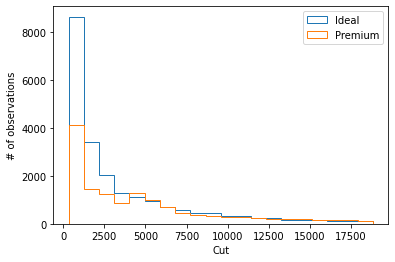

In [10]:
fig, ax = plt.subplots()
ax.hist(data_ideal, bins = 20, label = 'Ideal', histtype = 'step')
ax.hist(data_premium, bins = 20, label = 'Premium', histtype = 'step')

ax.set_xlabel('Cut')
ax.set_ylabel('# of observations')
ax.legend()
plt.show()

# Statistical plotting

## Error bars

I am visualising the values on the 3 dimensions of a dimond (x, y and z). Warning: this visualisation won't make any sense. Although there are some pretty big stones!

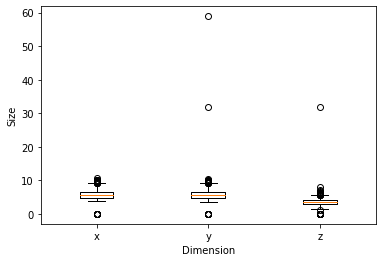

In [16]:
fig, ax = plt.subplots()
ax.boxplot([data['x'], data['y'], data['z']])
ax.set_xticklabels(['x', 'y', 'z'])
ax.set_ylabel('Size')
ax.set_xlabel('Dimension')

plt.show()

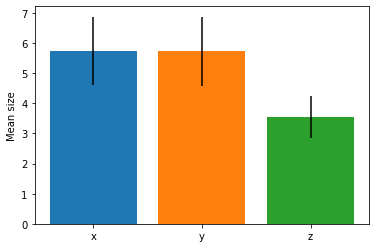

In [30]:
# create barplotting function
def plot_bar(dim): 
    return ax.bar(dim, data[dim].mean(), 
               yerr = data[dim].std())

# plot
fig, ax = plt.subplots()
plot_bar('x')
plot_bar('y')
plot_bar('z')

ax.set_ylabel('Mean size')
plt.show()


# Scatterplots


In [33]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


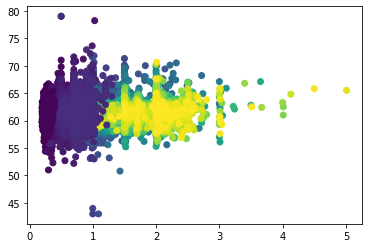

In [36]:
fig, ax = plt.subplots()
ax.scatter(data['carat'], data['depth'], 
           c = data['price'])
plt.show()
